<a href="https://colab.research.google.com/github/Rohan5076/machine-learning/blob/main/Using_Principal_Component_Analysis_(PCA)_for_Machine_Learning(Boston_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Python program to perform classification on Iris dataset
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as san
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [51]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [52]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)



print(boston_pd.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [53]:
boston_pd.rename(columns = {'House Price':'House_Price'}, inplace = True)

In [54]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [55]:
def binningfunction(col,cut_points,labels=None):
  minval =col.min()
  maxval =col.max()
  break_points=[minval]+ cut_points +[maxval] 
  print(break_points)
  if not labels:
    labels =range(len(cut_points)+1)
  colbin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colbin

In [56]:
cut_points=[16.25,27.5,38.75];
labels=["1","2","3","4"]
boston_pd["House_Rating"]=binningfunction(boston_pd["House_Price"],cut_points,labels)
boston_pd

[5.0, 16.25, 27.5, 38.75, 50.0]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,House_Rating
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,2


In [58]:
boston_pd.drop(['House_Price'],axis=1,inplace=True)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Rating
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3


In [62]:
# input
X = boston_pd.iloc[:, :-1]

#output
Y =boston_pd.iloc[:, -1]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
	boston_pd.iloc[:, :-1],
  boston_pd.iloc[:, -1],
	test_size = 0.25)

In [64]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [65]:
print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.8818897637795275


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = boston_pd.iloc[:,:-1]      
y = boston_pd.iloc[:,-1]
#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.875

# **Method 3 — Training the Model using Reduced Features (PCA)**

In [71]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = boston_pd.iloc[:,:-1]
y = boston_pd.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [72]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [73]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[47.12960636 11.02519325  9.55858979  6.5967316   6.42166105  5.05697827
  4.11812374  3.04690242  2.13033331  1.69413711  1.43087975  1.30233058
  0.48853277]



In [74]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 47.12960636  58.1547996   67.7133894   74.310121    80.73178205
  85.78876032  89.90688406  92.95378648  95.08411979  96.7782569
  98.20913665  99.51146723 100.        ]



Text(0, 0.5, 'Explained variance (%)')

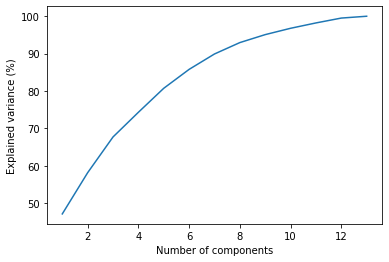

In [75]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[47.12960636 58.1547996  67.7133894  74.310121   80.73178205 85.78876032
 89.90688406 92.95378648]
Number of components: 8


Text(0, 0.5, 'Explained variance (%)')

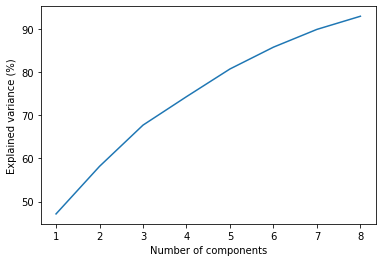

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [84]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.2509514  0.25631454 0.34667207 0.00504243 0.34285231 0.18924257
  0.3136706  0.32154387 0.31979277 0.33846915 0.20494226 0.20297261
  0.30975984]
 [0.31525237 0.3233129  0.11249291 0.45482914 0.21911553 0.14933154
  0.31197778 0.34907    0.27152094 0.23945365 0.30589695 0.23855944
  0.07432203]
 [0.24656649 0.29585782 0.01594592 0.28978082 0.12096411 0.59396117
  0.01767481 0.04973627 0.28725483 0.22074447 0.32344627 0.3001459
  0.26700025]
 [0.06177071 0.12871159 0.01714571 0.81594136 0.12822614 0.28059184
  0.17520603 0.21543585 0.13234996 0.10333509 0.28262198 0.1684985
  0.06941441]
 [0.08215692 0.32061699 0.00781119 0.08653094 0.13685356 0.4234472
  0.01669085 0.09859225 0.20413162 0.13046057 0.58400223 0.34560695
  0.39456113]
 [0.21965961 0.3233881  0.0761379  0.16749014 0.15298267 0.05926707
  0.07170914 0.02343872 0.14319401 0.19293428 0.2731533  0.80345454
  0.05321583]
 [0.77760721 0.27499628 0.33957645 0.07413621 0.19963484 0.06393992
  0.11601071 0.10390044 0.13794255 

In [85]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['INDUS', 'NOX', 'TAX', 'DIS']
Component 1: ['CHAS', 'DIS', 'ZN', 'CRIM']
Component 2: ['RM', 'PTRATIO', 'B', 'ZN']
Component 3: ['CHAS', 'PTRATIO', 'RM', 'DIS']
Component 4: ['PTRATIO', 'RM', 'LSTAT', 'B']
Component 5: ['B', 'ZN', 'PTRATIO', 'CRIM']
Component 6: ['CRIM', 'INDUS', 'TAX', 'ZN']
Component 7: ['AGE', 'LSTAT', 'ZN', 'RM']


In [86]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(506, 8)
[[-2.09829747  0.77311275  0.34294273 ... -0.31533814  0.31864075
   0.2958318 ]
 [-1.45725167  0.59198521 -0.69519931 ...  0.26422321  0.55386126
  -0.22366994]
 [-2.07459756  0.5996394   0.1671216  ...  0.44809462  0.48455996
   0.10516613]
 ...
 [-0.31236047  1.15524644 -0.40859759 ...  0.46794669  0.29411936
  -0.63866037]
 [-0.27051907  1.04136158 -0.58545406 ...  0.48225947  0.27159707
  -0.57934447]
 [-0.12580322  0.76197805 -1.294882   ...  0.40147353  0.17530965
  -0.13338197]]


In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [88]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('regressor', LogisticRegression())])

In [89]:
log_regress_model.score(X_test,y_test)

0.8421052631578947